# Machine Learning

### Concepts
- Supervised Learning
- Classification
- Regression
- Unsupervised Learning
- Overfitting
- Underfitting
- Training and test set

## Supervised and Unsupervised Learning

In **Supervised Learning** we know the correct answers. The model is predicting an output value y based on an input value x.

In **Unsupervised Learning** we have input data x, and examine the structure of the data without knowing what the outcome should be.

## Classification or Regression

In **Classification**, Y is a category!

Classification problems are when we are training a model to predict qualitative targets, e.g. gender, or a type of fruit.
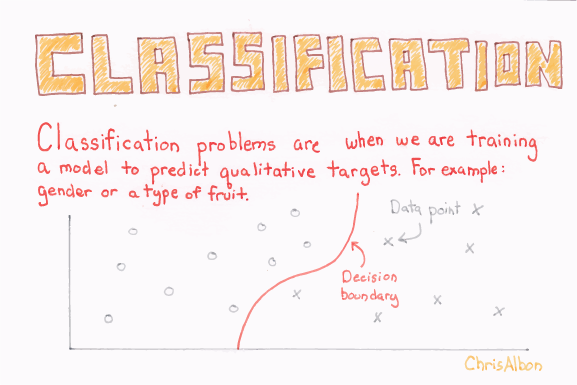


In **Regression**, Y is a scalar!

It has **magnitude**! It's not cat or dog? Spam or not spam? Those are binary!

### What are the most important Machine Learning methods?

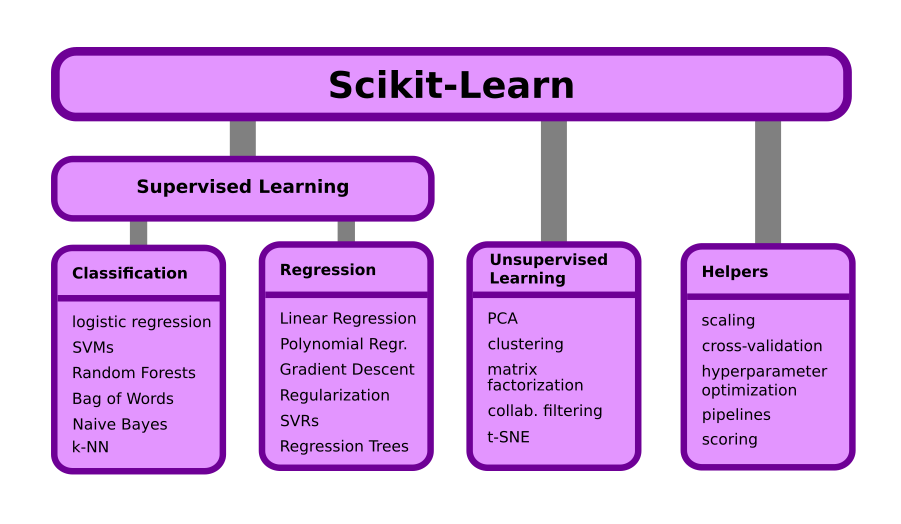

### Which Machine Learning method to use?

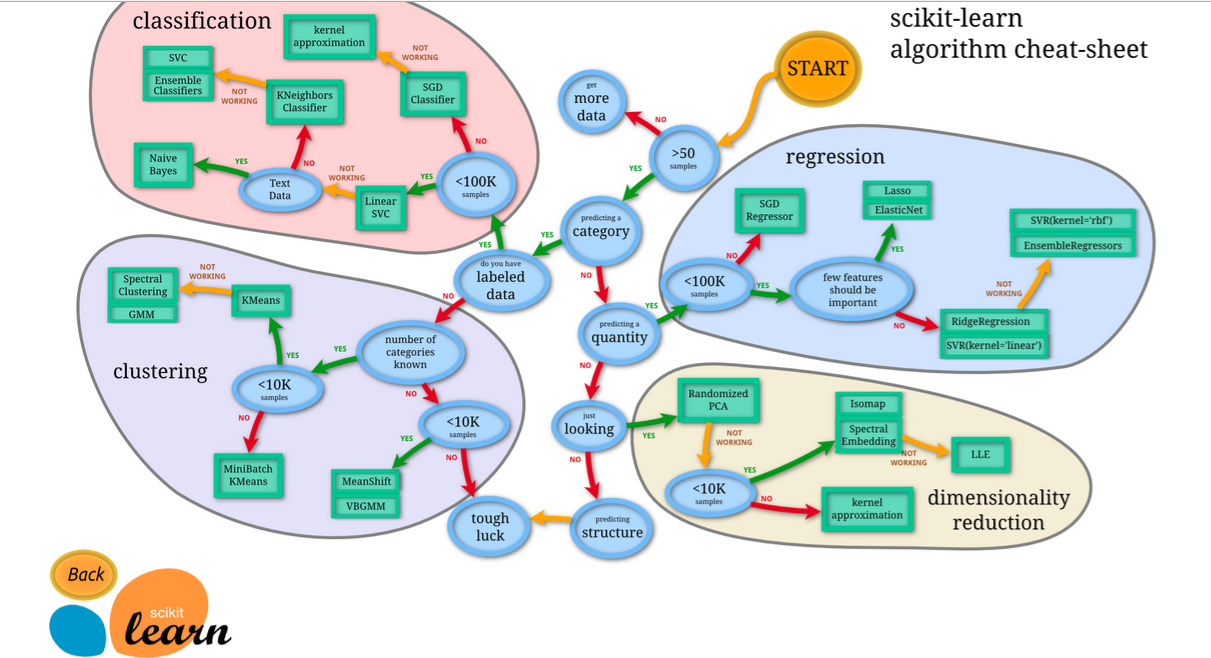

## Training and Test Sets

- Training: The data used to find the weights that minimise the loss

- Validation: The data used to tune the hyperparameters of the learning algorithm

- Test: The data used to evaluate the generalisability of the model

## Training and Test error

- Training error measures how well a model performs on the same data the model was trained on!

- Test error measures how well a model performs opn previously unseen data!

## Overfitting and Underfitting

- A model is underfit when it fails to capture the pattern in the data. It suffers from high bias!

- Overfitting is when our model has a higher accuracy than our test!

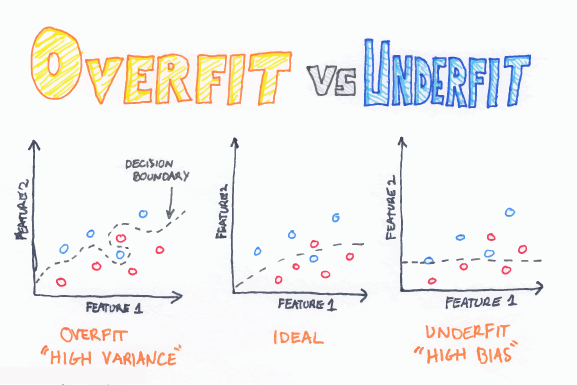

### Questions

1. What is a labeled training set?

2. What is a test set and why would you want to use it?

3. If your model performs great on the training data but generalizes poorly to new instances, what is happening?

4. Can you name three possible solutions to the problem above?

5. What is the “No free lunch theorem”?

6. What is information leakage and why should it be avoided?

7. What type of algorithm would you use to segment your customers into multiple groups?

8. Would you frame the problem of spam detection as a supervised learning problem or an unsupervised learning problem?

9. Why is setting the random seed useful when dividing datasets into training and test portions?

# Classification

We'll learn:

- to train a Logistic Regression classifier
- encode categories in your data as numbers
- encode scalars data as categories
- combine features to improve the accuracy of your model
- calculate accuracy, precision and recall

## Logistic Regression

Logistic regression is a classification method. Despite its name it is not a regression method! (This is a name mix up due to historical reasons.)

Linear regression (a regression method in supervised learning) doesn't always work well, the assumptions can be violated and you could end up with -1 or 2 values on a probability scale of 0 to 1 which is of course impossible. 

So instead we use a logistic function as a graph so that it can never leave our range of 0 and 1!

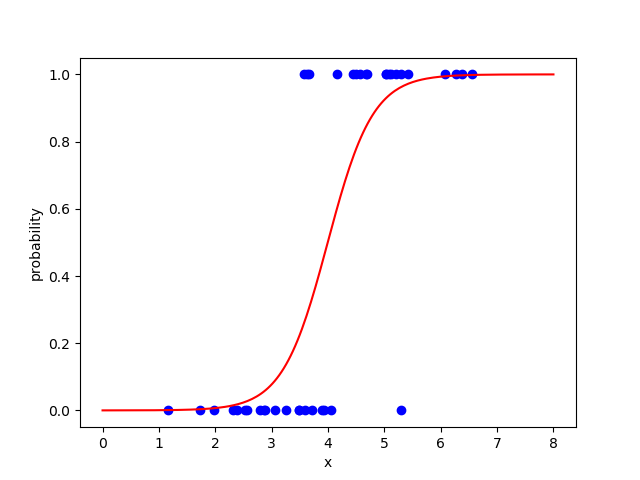

We can then create a probability formula to predict the probabilty of, in our current case, the chance of surviving the Titanic sinking, depending on what their passenger class was, and the cost of their ticket i.e. were they rich or poor?

Logisitic regression is used for sophisticated analysis in psychology, etc... Useful for features that are continuous or could be discreet

- Logistic regression uses a linear model (linear combination of coefficients on features), but converts it to probabilities using an exponential function called the sigmoid function.

- Logistic regression models the log probability or logit that the predicted variable assumes a given value.

**Logistic model**:

\begin{align}
\ p(X) = \frac{1}{(1+{e^{-x}})}
\end{align}
                          
This will be adapted to include linear algebra - the coefficients a and b modify our graph! By changing a and b we can never move out of the 0 to 1 scale!

\begin{align}
\ p(X) = \frac{1}{(1+{e^{-(ax + b)}})}
\end{align}

Slope

Intercept - tells us at what position the straight line slope starts!

### Probability Threshold
The output of the logistic function can be interpreted as a **probability**. To get the actual result, we need to threshold it to get the predicted class. The default threshold is 0.5:

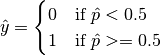

### (Log) Loss Function

How do we train a Logistic Regression model? In contrast to a linear regression, the Logistic Regression uses the **binary cross entropy (also called log loss) as a loss function**!

Log loss calculates how well our probabilities describe our data! The smaller the better.

What does it mean? It takes the log of the probability of correctly classifying a sample as positive or negative and then average it over all samples. For a single instance:

\begin{split}loss = \begin{cases} -log(\hat{p}) &\mbox{if } y = 1 \\
-log(1-\hat{p}) & \mbox{if } y = 0
\end{cases}\end{split}

And, for all instances *m*:
\begin{align}
loss = {-\frac{1}{m}\sum_{i=1}^{m}{y^{(i)} \cdot log(\hat{p}(y^{(i)})) + (1-y^{(i)}) \cdot log(1-\hat{p}(y^{(i)}))}}
\end{align}

### Titanic problem

So far, we have only used the ticket price! We will want to include other parameters. e.g. gender, passenger class, number of siblings, parents and children on board... We will therefore adapt our formula!

e.g. $a_{1}$ is the ticket price coefficient, $a_{2}$ coefficient is the age and you can see how much age affects likelihood of survival, etc 

And you still get your intercept b of which we only have 1 (it is just a number).

\begin{align}
\ p(X) = \frac{1}{(1+{e^{-(a{_1}x{_1} + a{_2}x{_2} + ...+ b)}})}
\end{align}
                             
We would still call this a linear model even if there are many features and we exist on the hyperplane.

### Logistic Regression Example using Scikit-learn:

In [1]:
from sklearn.datasets import make_moons
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

**Capital X tells you you have multiple columns (matrix), whilst lowercase y informs that you have a single column**:

In [5]:
X, y = make_moons(noise = 0.3)  
#less noise means you recognise shape better
# it defines how different from the actual shape it is
# at noise = 0

In [3]:
X.shape, y.shape

((100, 2), (100,))

Text(0, 0.5, 'x2')

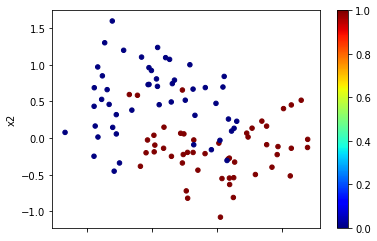

In [6]:
df = pd.DataFrame(X)
df.plot.scatter(0,1, c=y, cmap='jet')

plt.xlabel('x1')
plt.ylabel('x2')

### Build a Logistic Regression model that classifies a point as red or blue based on position ($x{_1}$, $x{_2}$) using Scikit-learn

This is a supervised ML learning model, and it's also classification!

We would like to find the coefficients ($a{_1}$, $a{_2}$ ... b) of the logistic function that result in the smallest possible log loss - because if the log loss is as small as possible then the prediction will be the most accurate!

$a{_1}$ and $a{_2}$ are coefficients that indicate that when we move to the right and the bottom the points are increasingly red, and to the left and the top increasingly blue!

In [7]:
from sklearn.linear_model import LogisticRegression

#### Create and train the model:

In [8]:
m = LogisticRegression(C=1e5) # create the model
m.fit(X,y)              #  train the model - find the best coefficients!

print(f'Coefficient, a1:{m.coef_[0][0]}, coefficient, a2: {m.coef_[0][1]}') 
print(f'Intercept, b = {m.intercept_[0]}')

Coefficient, a1:1.2836217377051984, coefficient, a2: -3.4840023569982375
Intercept, b = -0.16988320006570204


/Users/maximcondon/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


#### C : float, optional (default=1.0): Inverse of regularization strength; must be a positive float. Like in support vector machines, smaller values specify stronger regularization.

#### Note: Future warning is safe to ignore for now, it means we have a more up to date version than Kristian's and there are additional parameters at play in newer version of Scikit!

In [10]:
ypred = m.predict(X) # predicts the data points!

Now I want to calculate how well this works!

#### Now calculate the accuracy (score) of our data, then predict the data points!

In [9]:
m.score(X,y) # calculates the accuracy of our data

0.84

In [12]:
ypred = m.predict(X)    # predicts the data points!

In [13]:
ypred

array([1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1])

In [14]:
y # there are some differences where some of our predictions are different to actual points!

array([1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1])

We can even plot our predicted points to compare!

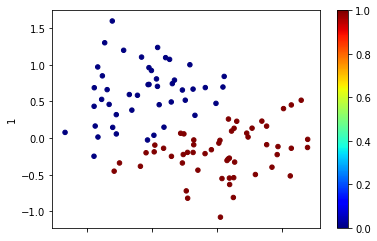

In [15]:
df.plot.scatter(0, 1, c=ypred, cmap='jet')

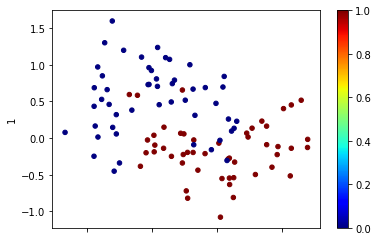

In [16]:
df.plot.scatter(0, 1, c=y, cmap='jet')

In the top plot, we see that it gets a lot of the predictions right, but it doesn't manage to predict the horseshoe shapes of what the actual graph looks like!

### Logistic regression is trying to find a linear boundary that separates one group of points from another!

Logistic Regression is a great model because it's fast, it is very transparent, we can see the coefficients and what they mean. It is a very robust model that can include a lot of different data sets

## Examples using Statsmodels

The statsmodels package gives a more detailed output:

In [19]:
import statsmodels.discrete.discrete_model as sm

logit = sm.Logit(y, X)
f = logit.fit()
print(f.params)
print(f.summary())

Optimization terminated successfully.
         Current function value: 0.373016
         Iterations 7
[ 1.1983085  -3.56208512]
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  100
Model:                          Logit   Df Residuals:                       98
Method:                           MLE   Df Model:                            1
Date:                Tue, 10 Sep 2019   Pseudo R-squ.:                  0.4619
Time:                        03:08:38   Log-Likelihood:                -37.302
converged:                       True   LL-Null:                       -69.315
                                        LLR p-value:                 1.228e-15
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.1983      0.307      3.899      0.000       0.596       1.801
x2 

### Why don’t we use a linear regression instead?
Modeling a binary variable violates some assumptions of linear regression:

- extrapolates to values beyond 0/1 and the transition area is sloppy
- residuals are not independent of X
- residuals are not normally distributed

### What advantages does LogReg offer?
- coefficients are easy to interpret
- the calculation is fast
- the input vector X can be scalar, ordinal, categorical or a mix
- you can fine-tune the probability threshold to optimize for precision and recall
- the logistic function is convex, it never gets stuck in local minima
- provides probabilities

### What are the disadvantages of Logreg?
- requires manual feature engineering
- the decision boundary is always linear
- if the data points are heavy on one side, this will strongly influence the coefficients

### What do you need to keep in mind?
Generally, be prepared for some **feature engineering** when using logistic regression.

- one assumption is that features are linearly independent. If you know this is not the case, consider **regularizing the model**.
- categorical features with more than two values must be **One-Hot encoded!**
- multiple one-hot-encoded features should be independent
- missing values need to be encoded as a separate feature
- ordinal features must be encoded as numbers
- it is assumed that the distance between ordinals is proportional to their value (if you don’t like that, use One-Hot encoding)

## Predicting Multiple Categories

Normally, Logreg models only two categories. Using the Softmax function (aka Multinomial Logistic Regression) you can calculate probabilities for multiple categories as well.

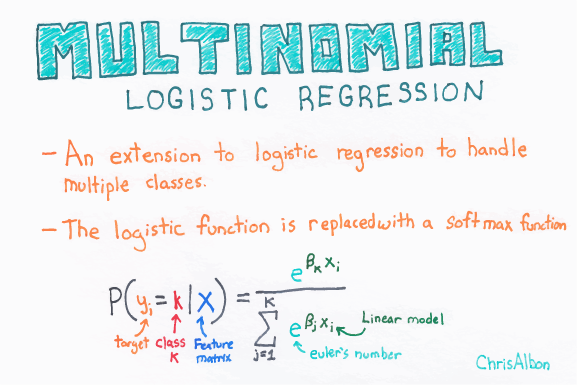

### One-Vs-Rest Logistic Regression

Alternatively, you can use the One-versus-Rest (OvR) or One-vs-All (OvA) approach.

- It is an extension to logistic regression to handle multiple classes.

- A separate model is trained for each class, predicting whether an observation is that class or not - making it a binary classification problem!

**In Multinomial Logistic Regression, the decision boundaries are still linear:**

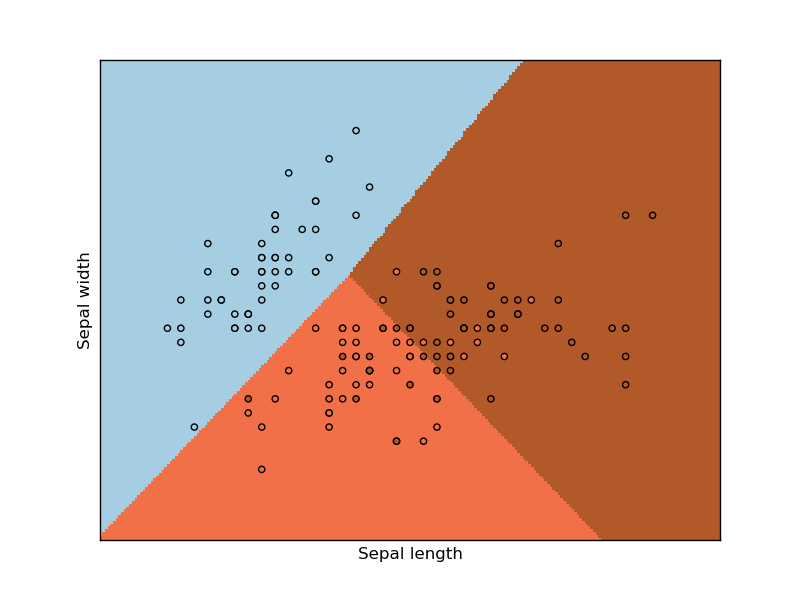


## Exercise

1. Build a logistic regression model for your data.

2. Print the coefficients calculated by the model.

                m.coef_, m.intercept_

3. Calculate the probabilities for your data points belonging to the positive class.

                m.predict_proba(X)

Also calculate the log probabilities:

                m.predict_log_proba(X)

4. Suppose you classify all points with a probability > 0.9 as positive. How does the result of your prediction change?

How does it change if you change the threshold to > 0.1?

5. Why is feature engineering necessary when using Logistic Regression?

6. What does the hyperparameter C do?

7. What is a convex function?

8. Suppose you want to classify pictures as outdoor/indoor and day/night.

Should you implement two Logistic Regression classifiers or one Softmax Regression classifier?

9. What do the solvers mentioned in the Scikit-learn documentation do?